# Iris Dataset - KNN Classification Step-by-Step

**Student:** Aryan Dhiman  
**Course:** CSU1658 – Statistical Foundation of Data Sciences  
**Date:** November 2025

---

## Overview

This notebook demonstrates the process of training and evaluating a K-Nearest Neighbors (KNN) classifier using the classic Iris dataset. Each step is explained, highlighting what is being done, how, and why relevant libraries are used.

## 1. Importing Libraries

- `pandas`: For structured, tabular data operations and EDA.
- `numpy`: Scientific computation and efficient array math.
- `matplotlib.pyplot` & `seaborn`: For all visual plots (scatter, line, confusion matrix).
- `sklearn.datasets`: To load the Iris dataset.
- `sklearn.preprocessing.StandardScaler`: Scales quantitative features for modeling.
- `sklearn.model_selection.train_test_split`: Splits data into train/test for modeling.
- `sklearn.neighbors.KNeighborsClassifier`: The KNN model from scikit-learn.
- `sklearn.metrics`: For confusion matrix, accuracy score, and classification report.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## 2. Exploratory Data Analysis (EDA): head(), describe(), groupby()

**What:** Initial data inspection and statistical summary.

**Why:** It helps understand the underlying structure, classes, and feature profiles before modeling.

In [3]:
iris = load_iris(as_frame=True)
df = iris.frame.copy()
df['species'] = iris.target

print("First 5 rows of data:")
display(df.head())

print("Statistical Summary (describe):")
display(df.describe())

print("Mean feature values per class (groupby):")
display(df.groupby('species').mean())

First 5 rows of data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


Statistical Summary (describe):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


Mean feature values per class (groupby):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
0,5.006,3.428,1.462,0.246,0.0
1,5.936,2.770,4.260,1.326,1.0
2,6.588,2.974,5.552,2.026,2.0


## 3. Feature Scaling

**What:** Standard scale features so each contributes equally (mean=0, std=1).

**Why:** KNN uses distances; different scale features can bias predictions.

In [4]:
scaler = StandardScaler()
features = iris.data.columns
X = df[features]
y = df['species']
X_scaled = scaler.fit_transform(X)

## 4. Training/Test Split for Modeling

**What:** Divide data for unbiased accuracy assessment.

**Why:** Ensures that testing is done on unseen data.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

## 5. Training the KNN Model

**What:** Fit a KNN classifier to training data (default K=5).

**Why:** KNN assigns a class based on closest training samples.

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 6. Confusion Matrix & Accuracy Score

**What:** Evaluate classification results.

**Why:** Confusion matrix shows class-wise predictions; accuracy is overall correct rate.

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]
Accuracy Score: 0.91


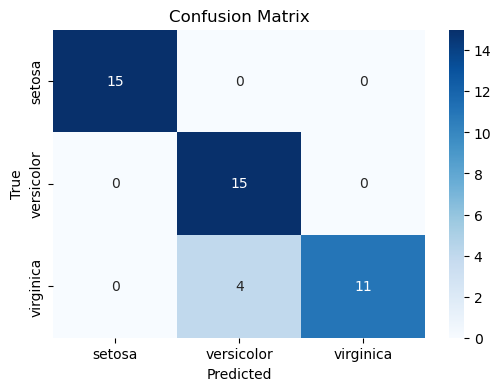

In [7]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print(f"Accuracy Score: {acc:.2f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 7. Classification Report

**What:** Precision, recall, f1-score for each iris class.

**Why:** Provides detailed view of how well each class is predicted.

In [8]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



## 8. Error Rate with Different K Values

**What:** Test KNN performance from k=1..20.

**Why:** Finds most reliable neighborhood size for best accuracy.

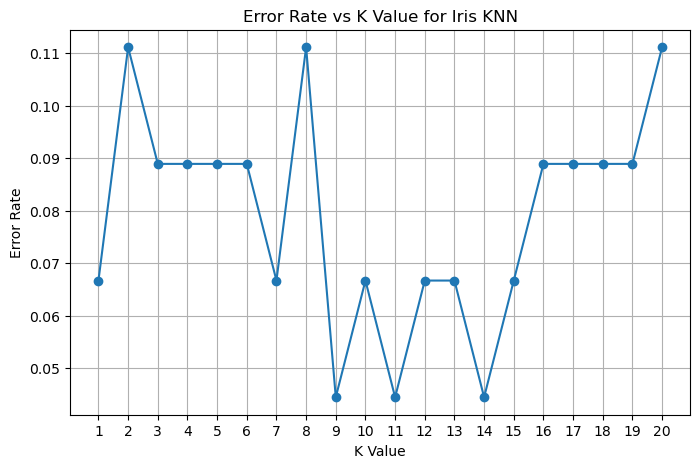

In [9]:
error_rates = []
k_range = range(1, 21)
for k in k_range:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    pred_k = knn_k.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rates.append(error)

plt.figure(figsize=(8,5))
plt.plot(k_range, error_rates, marker='o')
plt.xticks(k_range)
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K Value for Iris KNN")
plt.grid(True)
plt.show()

## 9. Best K Selection

**What:** Find k with minimum error.

**Why:** Ensures best KNN generalization.

In [10]:
best_k = k_range[np.argmin(error_rates)]
print("Best K value (lowest error rate):", best_k)

Best K value (lowest error rate): 9


## 10. Visualizing Test Results of KNN (True vs Predicted)

**What:** Scatter plot of two features, coloring by true and predicted labels.

**Why:** See visually where KNN gets the predictions right/wrong.

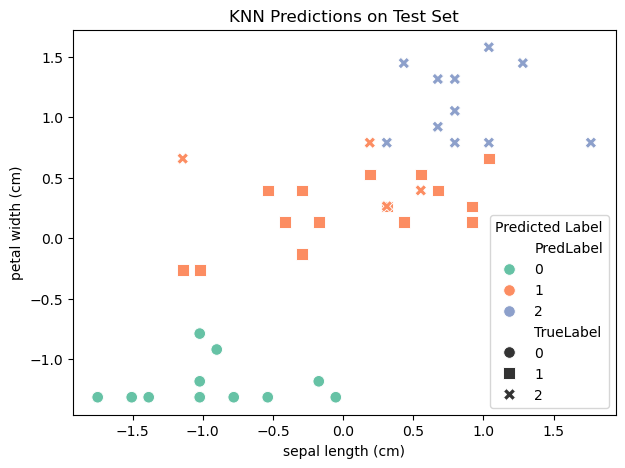

In [11]:
df_test = pd.DataFrame(X_test, columns=features)
df_test['TrueLabel'] = y_test.values
df_test['PredLabel'] = y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)',
                hue='PredLabel', style='TrueLabel', data=df_test,
                palette='Set2', markers=["o", "s", "X"], s=70)
plt.title("KNN Predictions on Test Set")
plt.legend(title='Predicted Label')
plt.show()